# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "document/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "https://api.openweathermap.org/data/2.5/weather?q=" + city + "&units=imperial&appid=" + weather_api_key
test_response = requests.get(url)
#print(test_response, url)

i = 1
city_holder = []
set_count = 1

for city in cities:
    try:
        if i == 50:
            set_count = set_count + 1
            i = 0
        print("Processing Record " + str(i) + " of Set " + str(set_count) + " | " + (city))
        url = "https://api.openweathermap.org/data/2.5/weather?q=" + city + "&units=imperial&appid=" + weather_api_key
        i= i + 1
    
    
        weather_response = requests.get(url)
        test_response = weather_response.json()

        #print(url)

        cloud = test_response["clouds"]["all"]
        country = test_response["sys"]["country"]
        date = test_response["dt"]
        humidity = test_response["main"]["humidity"]
        lat = test_response["coord"]["lat"]
        lng = test_response["coord"]["lon"]
        Max_temp = test_response["main"]["temp_max"]
        Wind_speed = test_response["wind"]["speed"]

        city_holder.append({"City" : city, "Cloudiness" : cloud, "Country": country, 
                            "Date" : date, "Humidity" : humidity, "Lat" : lat, "Lng" : lng, 
                            "Max Temp" : Max_temp, "Wind Speed" : Wind_speed})
        city_holder
    except: 
        print(city + "not found. Skipping...")
        pass
    

Processing Record 1 of Set 1 | eatonton
Processing Record 2 of Set 1 | lamu
Processing Record 3 of Set 1 | goderich
Processing Record 4 of Set 1 | zhitikara
zhitikaranot found. Skipping...
Processing Record 5 of Set 1 | menongue
Processing Record 6 of Set 1 | klaksvik
Processing Record 7 of Set 1 | luderitz
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | fortuna
Processing Record 12 of Set 1 | taolanaro
taolanaronot found. Skipping...
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | ilawa
Processing Record 16 of Set 1 | sistranda
Processing Record 17 of Set 1 | willmar
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | khatanga
Processing Record 22 of Set 1 | laguna
Processing Record 23 of Set 1 | noyabrsk
Pro

Processing Record 33 of Set 4 | castro
Processing Record 34 of Set 4 | starosubkhangulovo
Processing Record 35 of Set 4 | gerash
Processing Record 36 of Set 4 | bethel
Processing Record 37 of Set 4 | shakiso
Processing Record 38 of Set 4 | pedernales
Processing Record 39 of Set 4 | norman
Processing Record 40 of Set 4 | tigzirt
Processing Record 41 of Set 4 | teya
Processing Record 42 of Set 4 | mount isa
Processing Record 43 of Set 4 | lompoc
Processing Record 44 of Set 4 | deputatskiy
Processing Record 45 of Set 4 | semey
Processing Record 46 of Set 4 | dunmore east
Processing Record 47 of Set 4 | nabire
Processing Record 48 of Set 4 | cockburn town
Processing Record 49 of Set 4 | dolbeau
dolbeaunot found. Skipping...
Processing Record 0 of Set 5 | hatillo
Processing Record 1 of Set 5 | luena
Processing Record 2 of Set 5 | manakara
Processing Record 3 of Set 5 | novita
Processing Record 4 of Set 5 | barentsburg
barentsburgnot found. Skipping...
Processing Record 5 of Set 5 | alta flo

Processing Record 20 of Set 8 | vernon
Processing Record 21 of Set 8 | oranjemund
Processing Record 22 of Set 8 | dakar
Processing Record 23 of Set 8 | troitsko-pechorsk
Processing Record 24 of Set 8 | roros
Processing Record 25 of Set 8 | bacolod
Processing Record 26 of Set 8 | lavrentiya
Processing Record 27 of Set 8 | pisco
Processing Record 28 of Set 8 | pacific grove
Processing Record 29 of Set 8 | camacha
Processing Record 30 of Set 8 | katangli
Processing Record 31 of Set 8 | kotlas
Processing Record 32 of Set 8 | pitimbu
Processing Record 33 of Set 8 | alenquer
Processing Record 34 of Set 8 | elmira
Processing Record 35 of Set 8 | buala
Processing Record 36 of Set 8 | glendive
Processing Record 37 of Set 8 | belaya gora
Processing Record 38 of Set 8 | khonuu
khonuunot found. Skipping...
Processing Record 39 of Set 8 | basavana bagevadi
Processing Record 40 of Set 8 | salima
Processing Record 41 of Set 8 | barrhead
Processing Record 42 of Set 8 | verkhnetulomskiy
Processing Reco

Processing Record 7 of Set 12 | west bay
Processing Record 8 of Set 12 | claremore
Processing Record 9 of Set 12 | paraiso
Processing Record 10 of Set 12 | burica
buricanot found. Skipping...
Processing Record 11 of Set 12 | hit
Processing Record 12 of Set 12 | moose factory
Processing Record 13 of Set 12 | mount gambier
Processing Record 14 of Set 12 | poum
Processing Record 15 of Set 12 | bafoulabe
Processing Record 16 of Set 12 | yaounde
Processing Record 17 of Set 12 | mayumba
Processing Record 18 of Set 12 | kangaba
Processing Record 19 of Set 12 | ati
Processing Record 20 of Set 12 | nyandoma
Processing Record 21 of Set 12 | chodavaram
Processing Record 22 of Set 12 | kismayo
Processing Record 23 of Set 12 | khakurinokhabl
Processing Record 24 of Set 12 | wasilla
Processing Record 25 of Set 12 | todos santos
Processing Record 26 of Set 12 | inderborskiy
inderborskiynot found. Skipping...
Processing Record 27 of Set 12 | linxia
Processing Record 28 of Set 12 | zemio
Processing Rec

In [4]:
#city_holder

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
test_city = pd.DataFrame(city_holder)
test_city.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,eatonton,1,US,1586908444,56,33.33,-83.39,73.99,4.70
1,lamu,90,KE,1586908444,85,-2.27,40.90,81.73,9.33
2,goderich,89,CA,1586908445,63,43.75,-81.72,37.99,15.61
3,menongue,6,AO,1586908446,56,-14.66,17.69,63.34,2.64
4,klaksvik,100,FO,1586908446,100,62.23,-6.59,44.60,20.80
5,luderitz,86,NA,1586908447,67,-26.65,15.16,60.80,11.41
6,cape town,20,ZA,1586908233,87,-33.93,18.42,61.00,11.41
7,barrow,90,US,1586908220,85,71.29,-156.79,12.20,11.41
8,butaritari,66,KI,1586908448,80,3.07,172.79,83.66,17.02
9,fortuna,20,US,1586908448,54,40.60,-124.16,75.00,11.41


In [6]:
test_city.to_csv("RandomCities.csv")

In [7]:
from datetime import datetime
date = datetime.date(datetime.now())
print(date)

2020-04-14


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

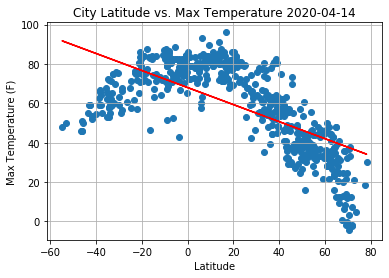

In [8]:
# t_slope, t_int, t_r, t_p, t_std_err = stats.linregress(latitude, temp)
# t_fit = t_slope * latitude + t_int
#line_equation_t = "y = " + str(t_slope) + "x +" + str(t_int)


latitude = test_city.iloc[:,5]
temp = test_city.iloc[:,7]
t_slope, t_int, t_r, t_p, t_std_err = stats.linregress(latitude, temp)
t_fit = t_slope * latitude + t_int
plt.scatter(latitude, temp)
plt.plot(latitude,t_fit,"r")#label='y={:.2f}x+{:.2f}'.format(t_slope,t_int))
#plt.annotate(line_equation_t,(5,10),fontsize=5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs. Max Temperature " + str(date))
plt.grid()
#how to add current date
plt.savefig("City Latitude vs Max Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

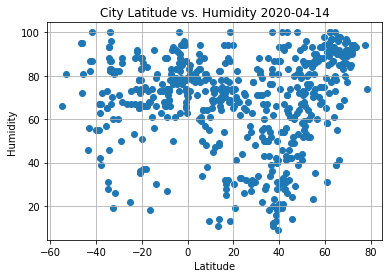

In [9]:
latitude = test_city.iloc[:,5]
humidity = test_city.iloc[:,4]
plt.scatter(latitude, humidity)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("City Latitude vs. Humidity " + str(date))
#how to add current date
plt.grid()
plt.savefig("City Latitude vs Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

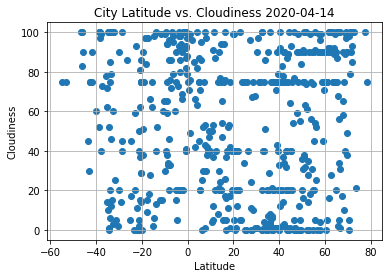

In [10]:
latitude = test_city.iloc[:,5]
cloudiness = test_city.iloc[:,1]
plt.scatter(latitude, cloudiness)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f"City Latitude vs. Cloudiness {date}")
#how to add current date
plt.grid()
plt.savefig("City Latitude vs Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

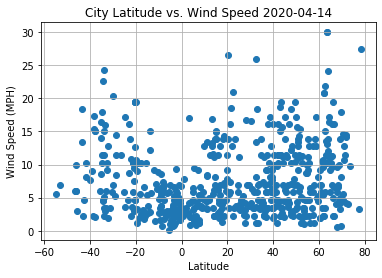

In [11]:
latitude = test_city.iloc[:,5]
wind_speed = test_city.iloc[:,8]
plt.scatter(latitude, wind_speed)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title(f"City Latitude vs. Wind Speed {date}")
#how to add current date
plt.grid()
plt.savefig("City Latitude vs Wind Speed.png")
plt.show()

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots


In [13]:
# Create Northern and Southern Hemisphere DataFrames

#north(greater than or equal to 0 degrees latitude)
northern_hem = test_city.loc[(test_city["Lat"]>=0)]
northern_hem


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,eatonton,1,US,1586908444,56,33.33,-83.39,73.99,4.70
2,goderich,89,CA,1586908445,63,43.75,-81.72,37.99,15.61
4,klaksvik,100,FO,1586908446,100,62.23,-6.59,44.60,20.80
7,barrow,90,US,1586908220,85,71.29,-156.79,12.20,11.41
8,butaritari,66,KI,1586908448,80,3.07,172.79,83.66,17.02
...,...,...,...,...,...,...,...,...,...
543,kosh-agach,36,RU,1586908725,44,50.00,88.67,31.66,3.22
544,dickinson,1,US,1586908726,48,29.46,-95.05,70.00,6.93
545,cuiluan,0,CN,1586908726,43,47.72,128.65,47.80,2.80
550,gigmoto,30,PH,1586908728,82,13.78,124.39,80.08,11.59


In [14]:
southern_hem = test_city.loc[(test_city["Lat"]<0)]
southern_hem

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,lamu,90,KE,1586908444,85,-2.27,40.90,81.73,9.33
3,menongue,6,AO,1586908446,56,-14.66,17.69,63.34,2.64
5,luderitz,86,NA,1586908447,67,-26.65,15.16,60.80,11.41
6,cape town,20,ZA,1586908233,87,-33.93,18.42,61.00,11.41
10,hobart,75,AU,1586908164,87,-42.88,147.33,59.00,2.24
...,...,...,...,...,...,...,...,...,...
540,vitoria,29,BR,1586908724,83,-20.32,-40.34,75.99,4.70
546,constitucion,14,CL,1586908688,73,-35.33,-72.42,52.93,8.50
547,port augusta,60,AU,1586908727,19,-32.50,137.77,75.00,10.29
548,iquitos,20,PE,1586908727,100,-3.75,-73.25,42.80,2.24


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

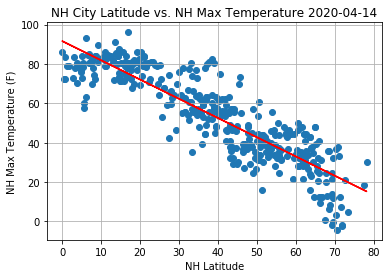

In [15]:
n_latitude = northern_hem.iloc[:,5]
n_temp = northern_hem.iloc[:,7]
nt_slope, nt_int, nt_r, nt_p, nt_std_err = stats.linregress(n_latitude, n_temp)
nt_fit = nt_slope * n_latitude + nt_int
plt.scatter(n_latitude, n_temp)
plt.plot(n_latitude,nt_fit,"r")#label='y={:.2f}x+{:.2f}'.format(t_slope,t_int))
#plt.annotate(line_equation_t,(5,10),fontsize=5)
plt.xlabel('NH Latitude')
plt.ylabel('NH Max Temperature (F)')
plt.title("NH City Latitude vs. NH Max Temperature " + str(date))
plt.grid()
#how to add current date
plt.savefig("NH City Latitude vs NH Max Temperature.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

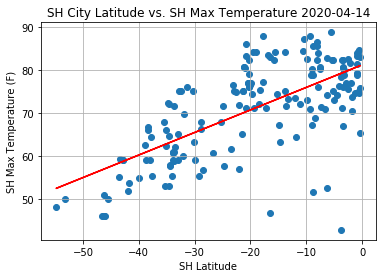

In [16]:
s_latitude = southern_hem.iloc[:,5]
s_temp = southern_hem.iloc[:,7]
st_slope, st_int, st_r, st_p, st_std_err = stats.linregress(s_latitude, s_temp)
st_fit = st_slope * s_latitude + st_int
plt.scatter(s_latitude, s_temp)
plt.plot(s_latitude,st_fit,"r")#label='y={:.2f}x+{:.2f}'.format(t_slope,t_int))
#plt.annotate(line_equation_t,(5,10),fontsize=5)
plt.xlabel('SH Latitude')
plt.ylabel('SH Max Temperature (F)')
plt.title("SH City Latitude vs. SH Max Temperature " + str(date))
plt.grid()
#how to add current date
plt.savefig("SH City Latitude vs SH Max Temperature.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

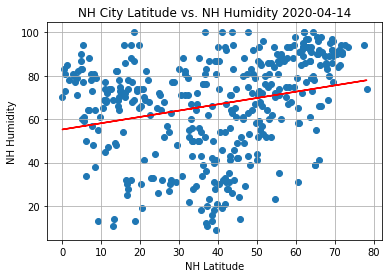

In [17]:
n_latitude = northern_hem.iloc[:,5]
n_humidity = northern_hem.iloc[:,4]
nh_slope, nh_int, nh_r, nh_p, nh_std_err = stats.linregress(n_latitude, n_humidity)
nh_fit = nh_slope * n_latitude + nh_int
plt.scatter(n_latitude, n_humidity)
plt.plot(n_latitude,nh_fit,"r")
plt.xlabel('NH Latitude')
plt.ylabel('NH Humidity')
plt.title("NH City Latitude vs. NH Humidity " + str(date))
#how to add current date
plt.grid()
plt.savefig("NH City Latitude vs NH Humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

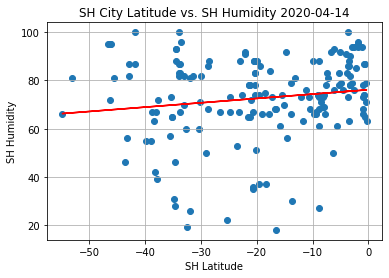

In [18]:
s_latitude = southern_hem.iloc[:,5]
s_humidity = southern_hem.iloc[:,4]
sh_slope, sh_int, sh_r, sh_p, sh_std_err = stats.linregress(s_latitude, s_humidity)
sh_fit = sh_slope * s_latitude + sh_int
plt.scatter(s_latitude, s_humidity)
plt.plot(s_latitude,sh_fit,"r")
plt.xlabel('SH Latitude')
plt.ylabel('SH Humidity')
plt.title("SH City Latitude vs. SH Humidity " + str(date))
#how to add current date
plt.grid()
plt.savefig("SH City Latitude vs SH Humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

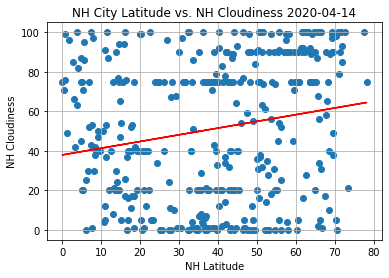

In [19]:
n_latitude = northern_hem.iloc[:,5]
n_cloudiness = northern_hem.iloc[:,1]
nc_slope, nc_int, nc_r, nc_p, nc_std_err = stats.linregress(n_latitude, n_cloudiness)
nc_fit = nc_slope * n_latitude + nc_int
plt.scatter(n_latitude, n_cloudiness)
plt.plot(n_latitude,nc_fit,"r")
plt.xlabel('NH Latitude')
plt.ylabel('NH Cloudiness')
plt.title(f"NH City Latitude vs. NH Cloudiness {date}")
#how to add current date
plt.grid()
plt.savefig("NH City Latitude vs NH Cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

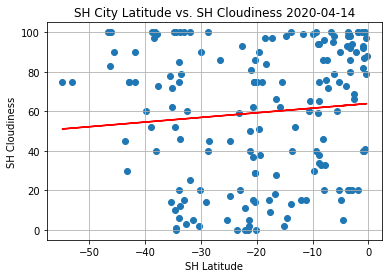

In [20]:
s_latitude = southern_hem.iloc[:,5]
s_cloudiness = southern_hem.iloc[:,1]
sc_slope, sc_int, sc_r, sc_p, sc_std_err = stats.linregress(s_latitude, s_cloudiness)
sc_fit = sc_slope * s_latitude + sc_int
plt.scatter(s_latitude, s_cloudiness)
plt.plot(s_latitude,sc_fit,"r")
plt.xlabel('SH Latitude')
plt.ylabel('SH Cloudiness')
plt.title(f"SH City Latitude vs. SH Cloudiness {date}")
#how to add current date
plt.grid()
plt.savefig("SH City Latitude vs SH Cloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

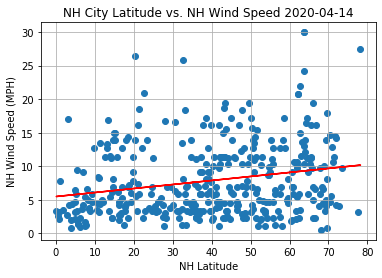

In [21]:
n_latitude = northern_hem.iloc[:,5]
n_wind_speed = northern_hem.iloc[:,8]
nw_slope, nw_int, nw_r, nw_p, nw_std_err = stats.linregress(n_latitude, n_wind_speed)
nw_fit = nw_slope * n_latitude + nw_int
plt.scatter(n_latitude, n_wind_speed)
plt.plot(n_latitude,nw_fit,"r")
plt.xlabel('NH Latitude')
plt.ylabel('NH Wind Speed (MPH)')
plt.title(f"NH City Latitude vs. NH Wind Speed {date}")
#how to add current date
plt.grid()
plt.savefig("NH City Latitude vs NH Wind Speed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

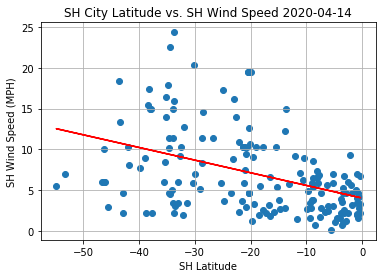

In [22]:
s_latitude = southern_hem.iloc[:,5]
s_wind_speed = southern_hem.iloc[:,8]
sw_slope, sw_int, sw_r, sw_p, sw_std_err = stats.linregress(s_latitude, s_wind_speed)
sw_fit = sw_slope * s_latitude + sw_int
plt.scatter(s_latitude, s_wind_speed)
plt.plot(s_latitude,sw_fit,"r")
plt.xlabel('SH Latitude')
plt.ylabel('SH Wind Speed (MPH)')
plt.title(f"SH City Latitude vs. SH Wind Speed {date}")
#how to add current date
plt.grid()
plt.savefig("SH City Latitude vs SH Wind Speed.png")
plt.show()

## Observation:
1. Based on the data we can see that cities closer to the equator tend to have warmer temperatures than cities near    the northern, and southern poles.
2. Our random sample generated more cities in the northern hemisphere than the southern hemisphere, perhaps there      is data to prove that the northern hemisphere is more populated than the southern hemisphere.
3. The Wind Speed in the northern hemispheres is more uniform than Wind Speed in the southern hemisphere. 